In [1]:
import numpy as np
import xarray as xr
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

%matplotlib inline
plt.rcParams['image.cmap'] = 'jet'
#sns.set(font_scale=2)

In [18]:
# Parent directory for the results of this run
group_results_directory = '/data/jpetrie/MEOPAR/SalishSea/results/param_search/'
tracer_file = 'SS5x5_1h_20150201_20150501_ptrc_T.nc'
individual_directories = []
param_vals = []
param_name = "nampissink_zz_w_sink_pmicro_max"
for file in os.listdir(group_results_directory):
    if os.path.isfile(group_results_directory + file + '/' + tracer_file):
        if file.startswith(param_name):
            val = float(file.split(param_name + "_")[1])
            individual_directories.append(file)
            param_vals.append(val)

tracer_datasets = [xr.open_dataset(group_results_directory + '/' + file +'/' + tracer_file) for file in individual_directories]
dataset_dict = dict(zip(param_vals, tracer_datasets))

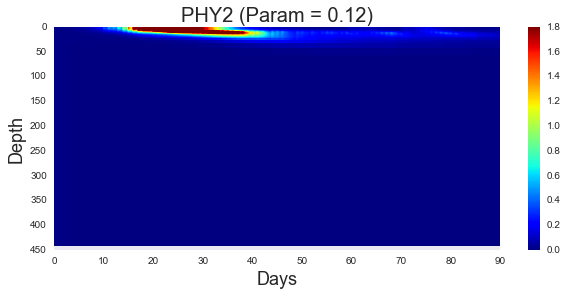

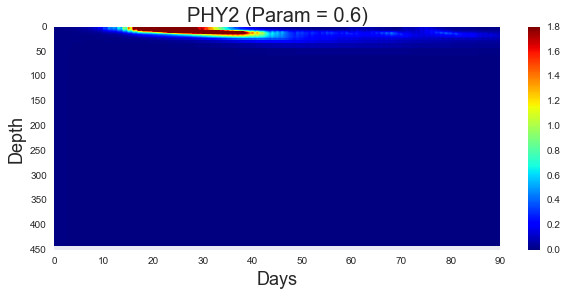

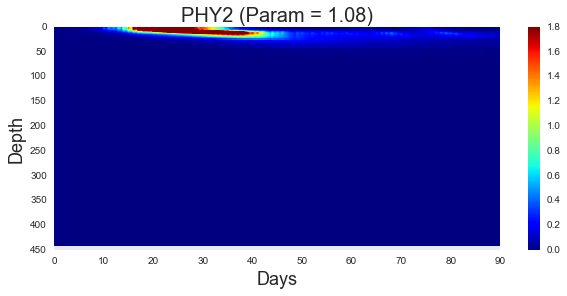

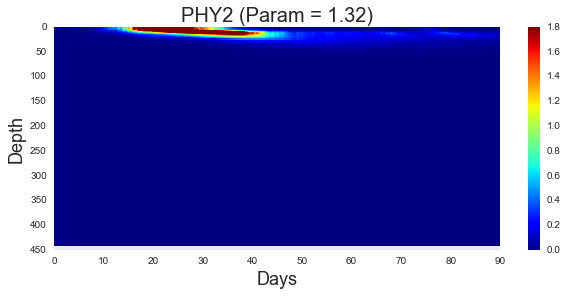

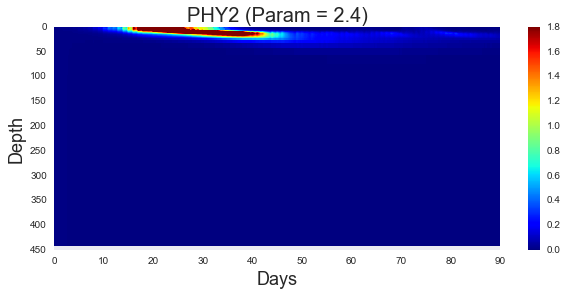

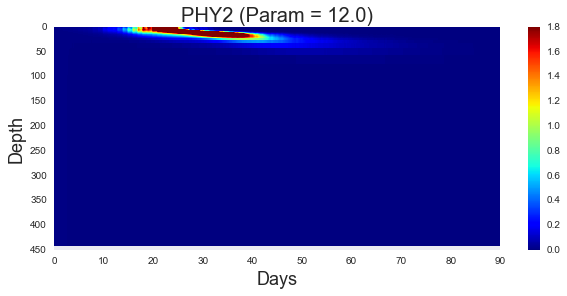

In [19]:
# Plot depth/time/DON heatmap for each value of alpha
tracer = "PHY2"


keys = (list(dataset_dict.keys()))
keys.sort()

for param_val in keys:
    z = dataset_dict[param_val].deptht.values
    t= np.array([float(x) for x in dataset_dict[param_val].time_centered.values])
    tz,zt=np.meshgrid((t[:] - t[0])/10**9/3600/24,z[:])
    
    fig, ax = plt.subplots(1, 1,figsize=(10,4))
    mesh=plt.pcolormesh(tz,zt,dataset_dict[param_val][tracer].values[:,:,2,2].T, vmin = 0,vmax = 1.8)
    fig.colorbar(mesh)
    plt.gca().invert_yaxis()
    plt.title(tracer +  " (Param = " + str(param_val)+")", size = 20)
    plt.xlabel("Days", size =18)
    plt.ylabel("Depth", size = 18)

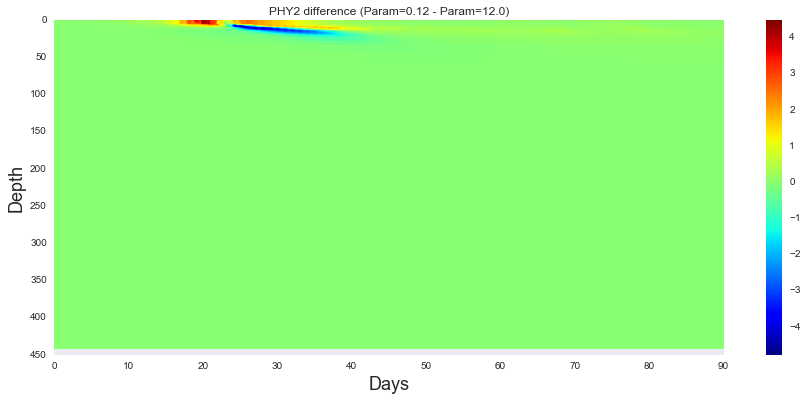

In [17]:
# Plot the difference in DON concentration vs depth and time
fig, ax = plt.subplots(1, 1,figsize=(15,6))
param_1 = min(param_vals)
param_2 = max(param_vals)
mesh=plt.pcolormesh(tz,zt,dataset_dict[param_1][tracer].values[:,:,2,2].T - dataset_dict[param_2][tracer].values[:,:,2,2].T)
fig.colorbar(mesh)
plt.gca().invert_yaxis()
plt.xlabel("Days", size =18)
plt.ylabel("Depth", size = 18)
plt.title(tracer + " difference (Param=" + str(param_1) + " - Param=" +str(param_2)+ ")")

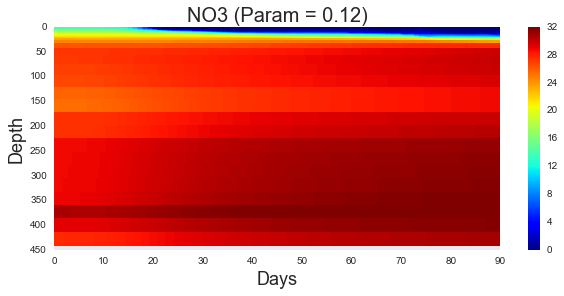

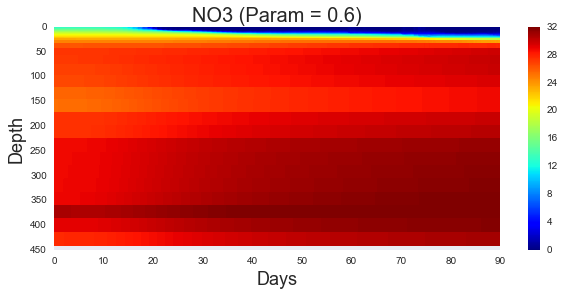

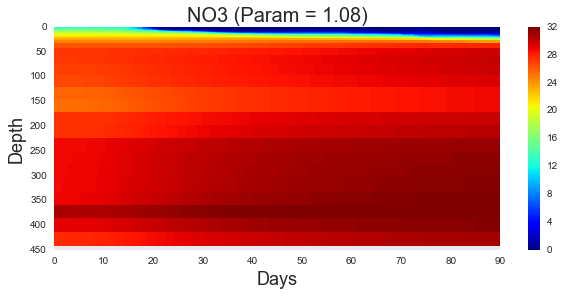

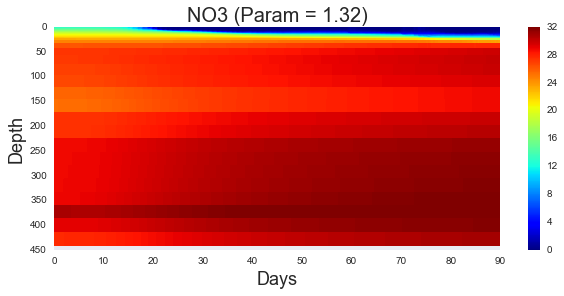

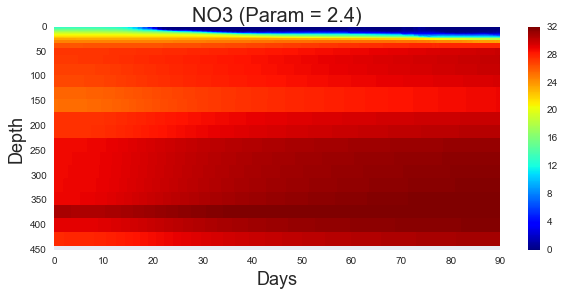

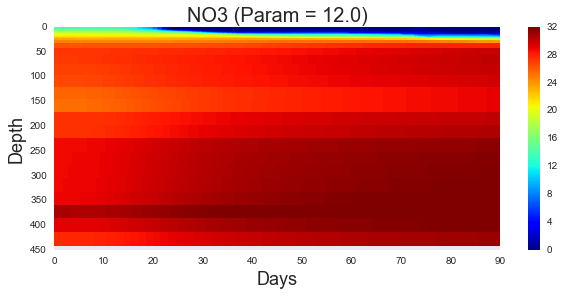

In [20]:
# Plot depth/time/NO3 heatmap for each value
tracer = "NO3"


for param_val in keys:
    z = dataset_dict[param_val].deptht.values
    t= np.array([float(x) for x in dataset_dict[param_val].time_centered.values])
    tz,zt=np.meshgrid((t[:] - t[0])/10**9/3600/24,z[:])
    
    fig, ax = plt.subplots(1, 1,figsize=(10,4))
    mesh=plt.pcolormesh(tz,zt,dataset_dict[param_val][tracer].values[:,:,2,2].T, vmin = 0, vmax = 32)
    fig.colorbar(mesh)
    plt.gca().invert_yaxis()
    plt.title(tracer + " (Param = " + str(param_val)+")", size = 20)
    plt.xlabel("Days", size =18)
    plt.ylabel("Depth", size = 18)

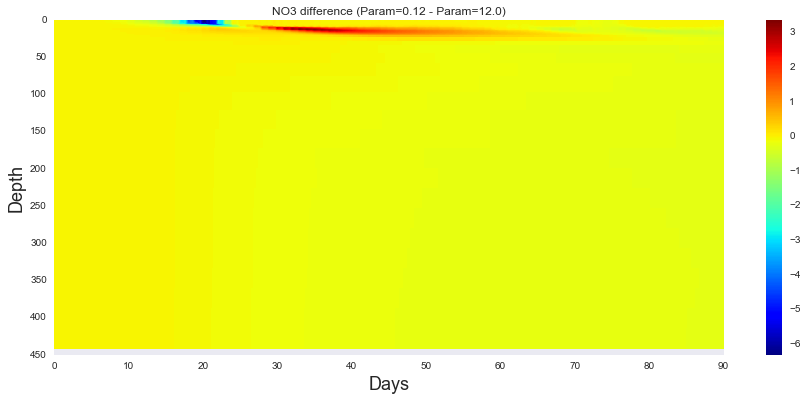

In [21]:
# Plot the difference in NO3 concentration vs depth and time
fig, ax = plt.subplots(1, 1,figsize=(15,6))
param_1 = min(param_vals)
param_2 = max(param_vals)

mesh=plt.pcolormesh(tz,zt,dataset_dict[param_1][tracer].values[:,:,2,2].T - dataset_dict[param_2][tracer].values[:,:,2,2].T)
fig.colorbar(mesh)
plt.gca().invert_yaxis()
plt.xlabel("Days", size =18)
plt.ylabel("Depth", size = 18)
plt.title(tracer + " difference (Param=" + str(param_1) + " - Param=" +str(param_2)+ ")")

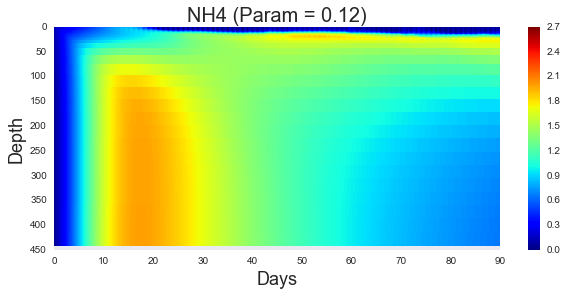

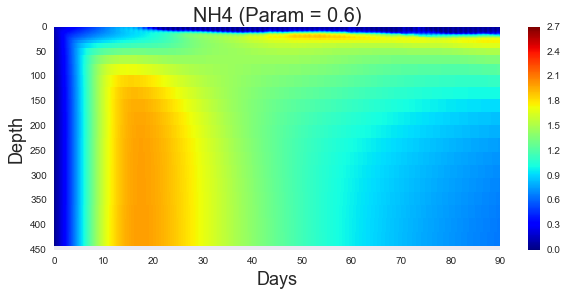

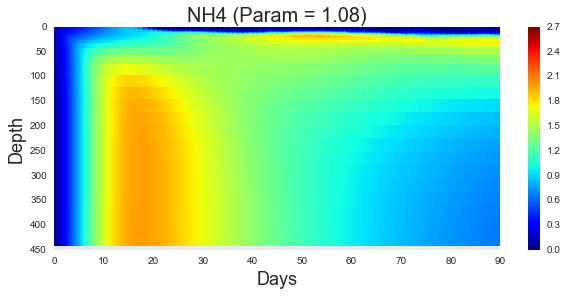

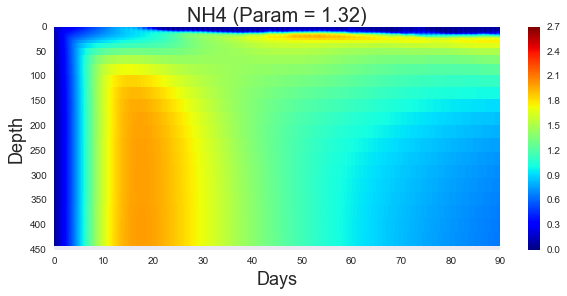

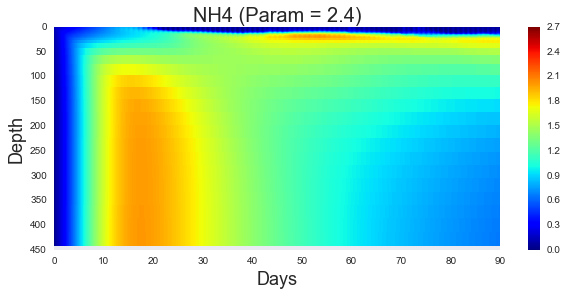

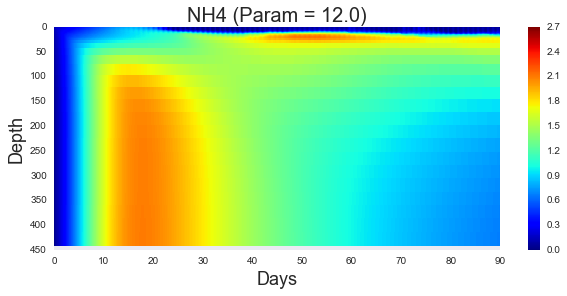

In [22]:
# Plot depth/time/DON heatmap for each value of alpha
tracer = "NH4"


keys = (list(dataset_dict.keys()))
keys.sort()

for param_val in keys:
    z = dataset_dict[param_val].deptht.values
    t= np.array([float(x) for x in dataset_dict[param_val].time_centered.values])
    tz,zt=np.meshgrid((t[:] - t[0])/10**9/3600/24,z[:])
    
    fig, ax = plt.subplots(1, 1,figsize=(10,4))
    mesh=plt.pcolormesh(tz,zt,dataset_dict[param_val][tracer].values[:,:,2,2].T, vmin = 0,vmax = 2.7)
    fig.colorbar(mesh)
    plt.gca().invert_yaxis()
    plt.title(tracer +  " (Param = " + str(param_val)+")", size = 20)
    plt.xlabel("Days", size =18)
    plt.ylabel("Depth", size = 18)

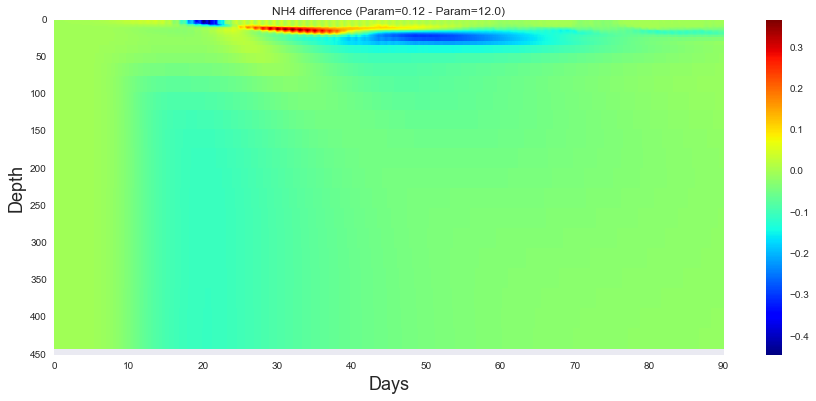

In [23]:
# Plot the difference in NO3 concentration vs depth and time
fig, ax = plt.subplots(1, 1,figsize=(15,6))
param_1 = min(param_vals)
param_2 = max(param_vals)

mesh=plt.pcolormesh(tz,zt,dataset_dict[param_1][tracer].values[:,:,2,2].T - dataset_dict[param_2][tracer].values[:,:,2,2].T)
fig.colorbar(mesh)
plt.gca().invert_yaxis()
plt.xlabel("Days", size =18)
plt.ylabel("Depth", size = 18)
plt.title(tracer + " difference (Param=" + str(param_1) + " - Param=" +str(param_2)+ ")")

In [24]:
# Convert list of xarrays to a single pandas dataframe. Easier to manipulate and plot
dataframe_list = []
for param_val in keys:
    df = dataset_dict[param_val].to_dataframe().query('x == 2 and y == 2 and axis_nbounds == 0')
    df[param_name] = param_val
    dataframe_list.append(df)

df_subset = pd.concat(dataframe_list)

df_subset.reset_index(inplace=True) # Get rid of that multiindex madness

In [25]:
plot_vars = [ 'DOC','MICZ', 'MYRI', 'NH4', 'NO3', 'O2', 'PHY', 'PHY2', 'POC', 'Si', 'bSi']

[   0.5000003     5.50015068   10.50476551   15.63428783   24.10025597
   76.58558655  199.57304382  333.75018311]


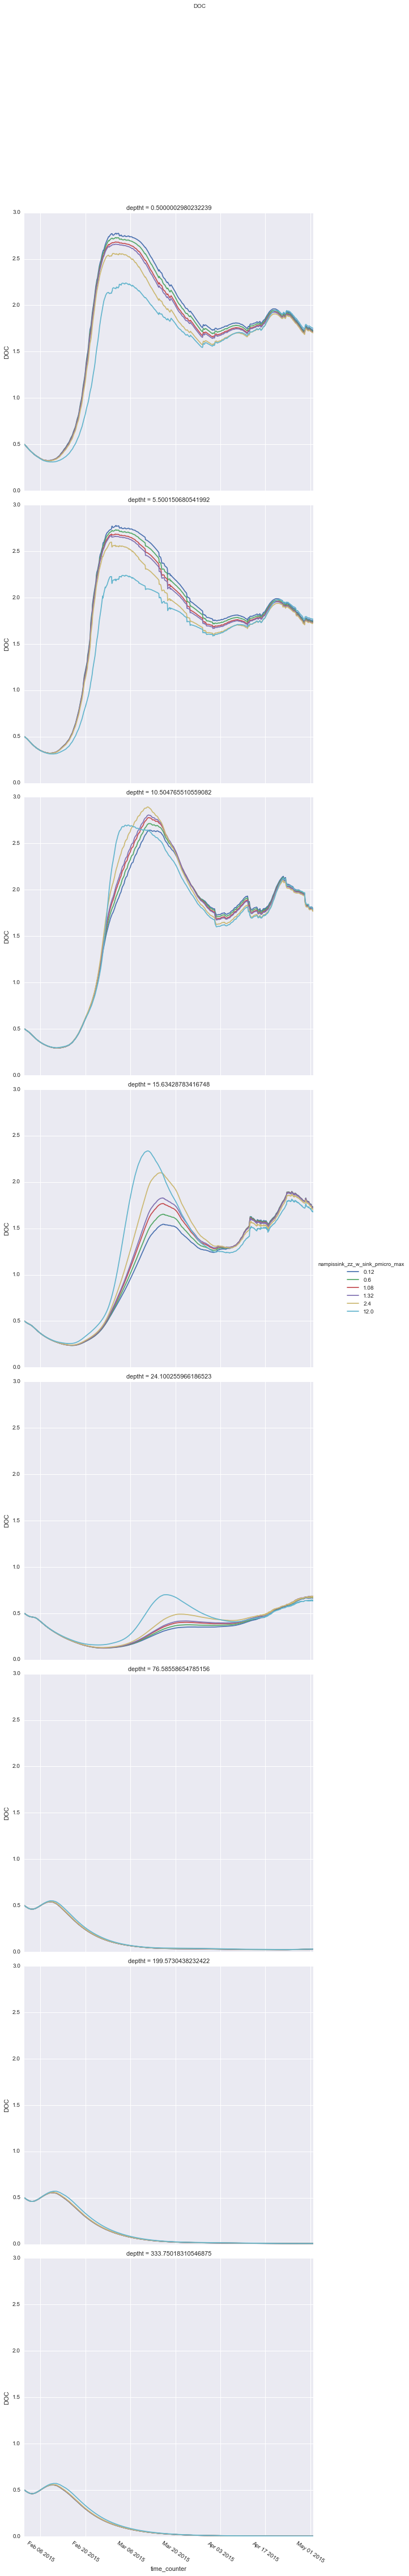

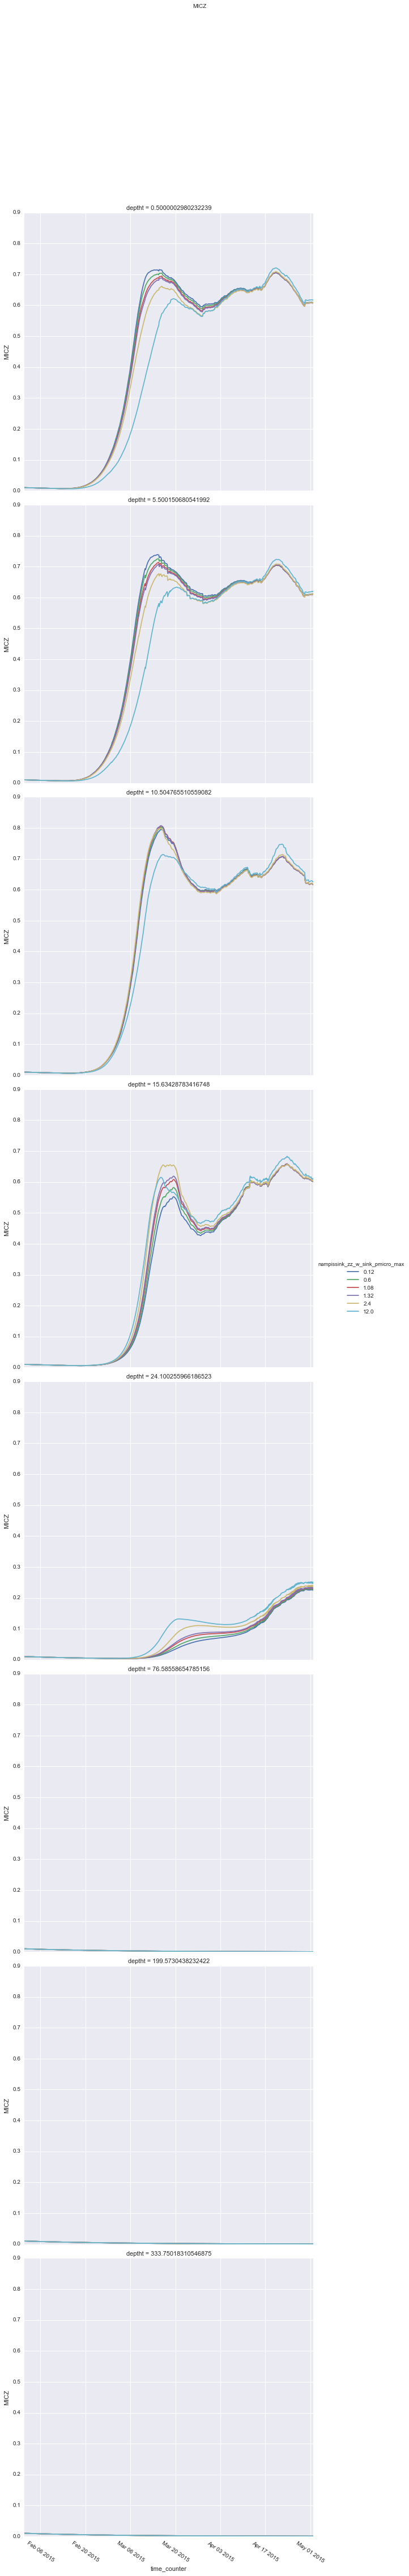

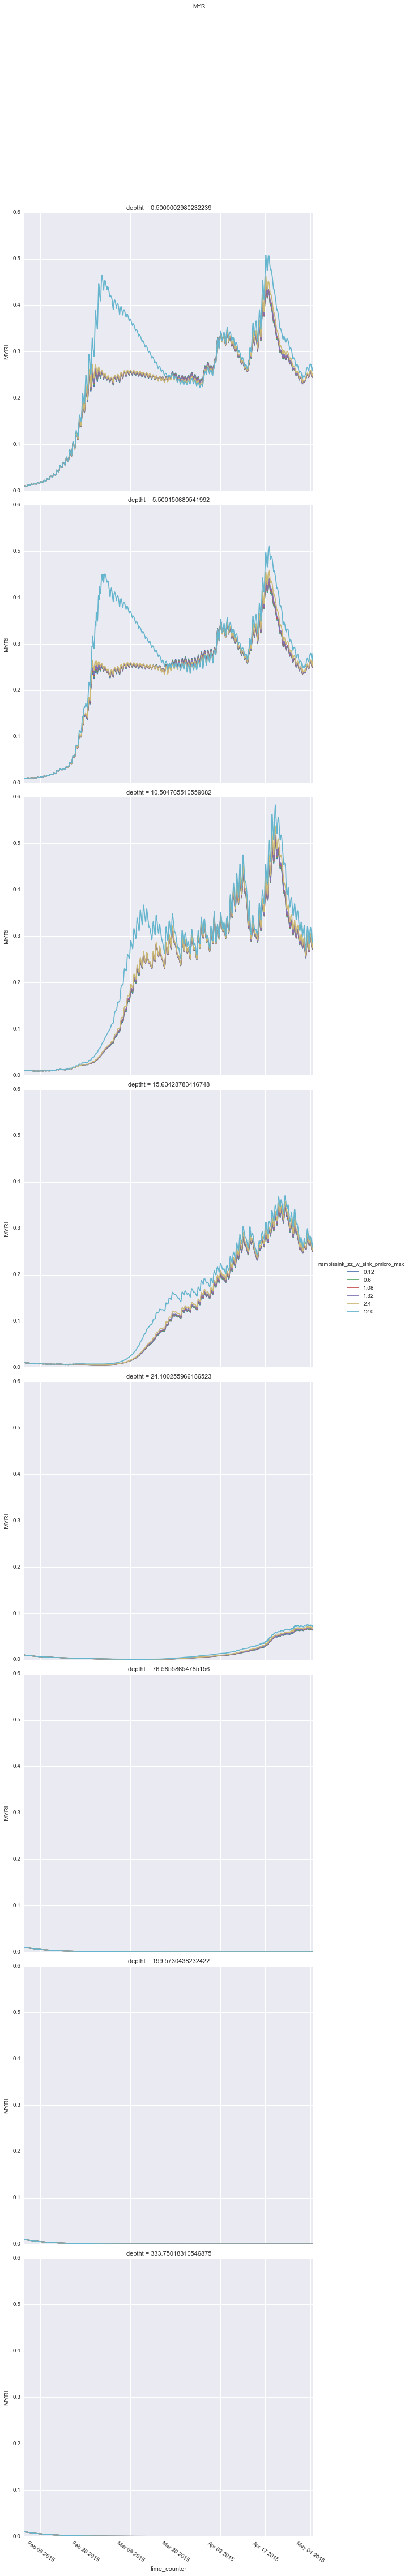

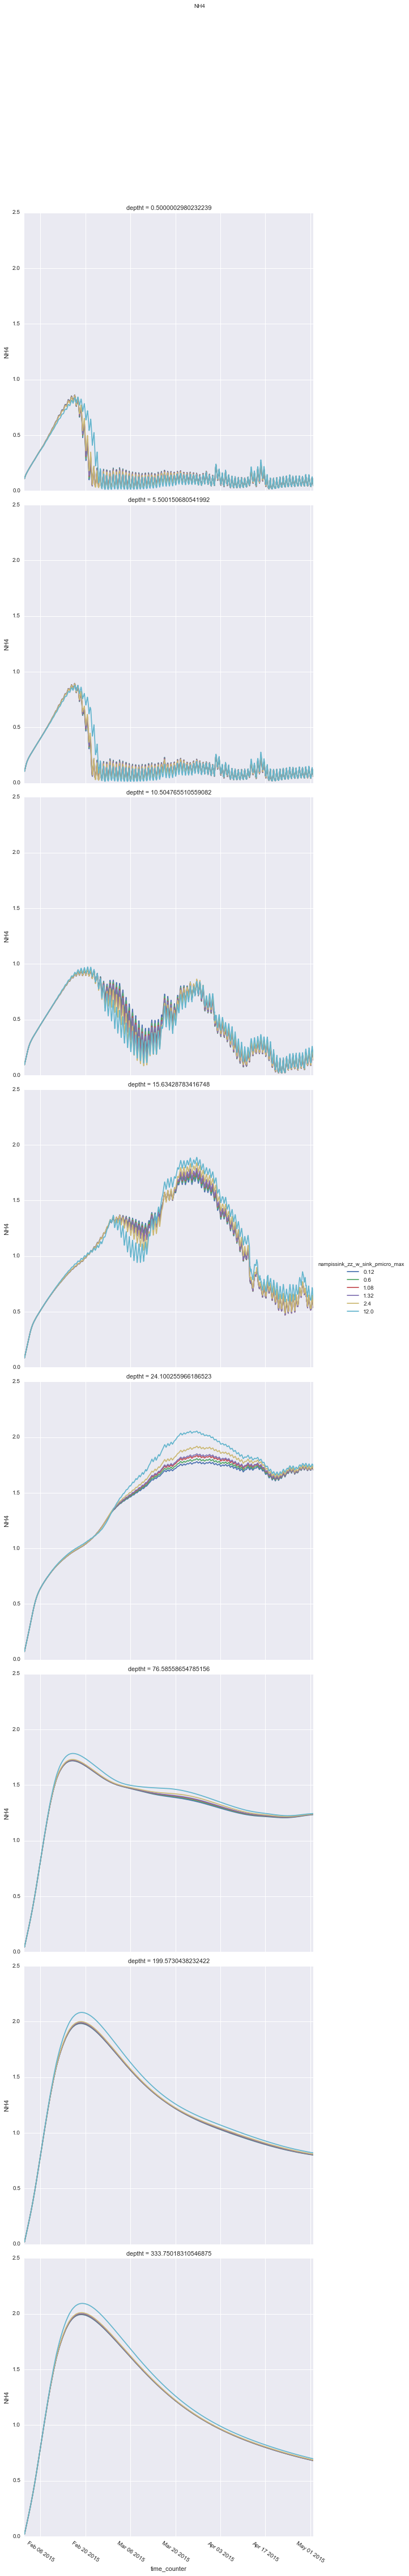

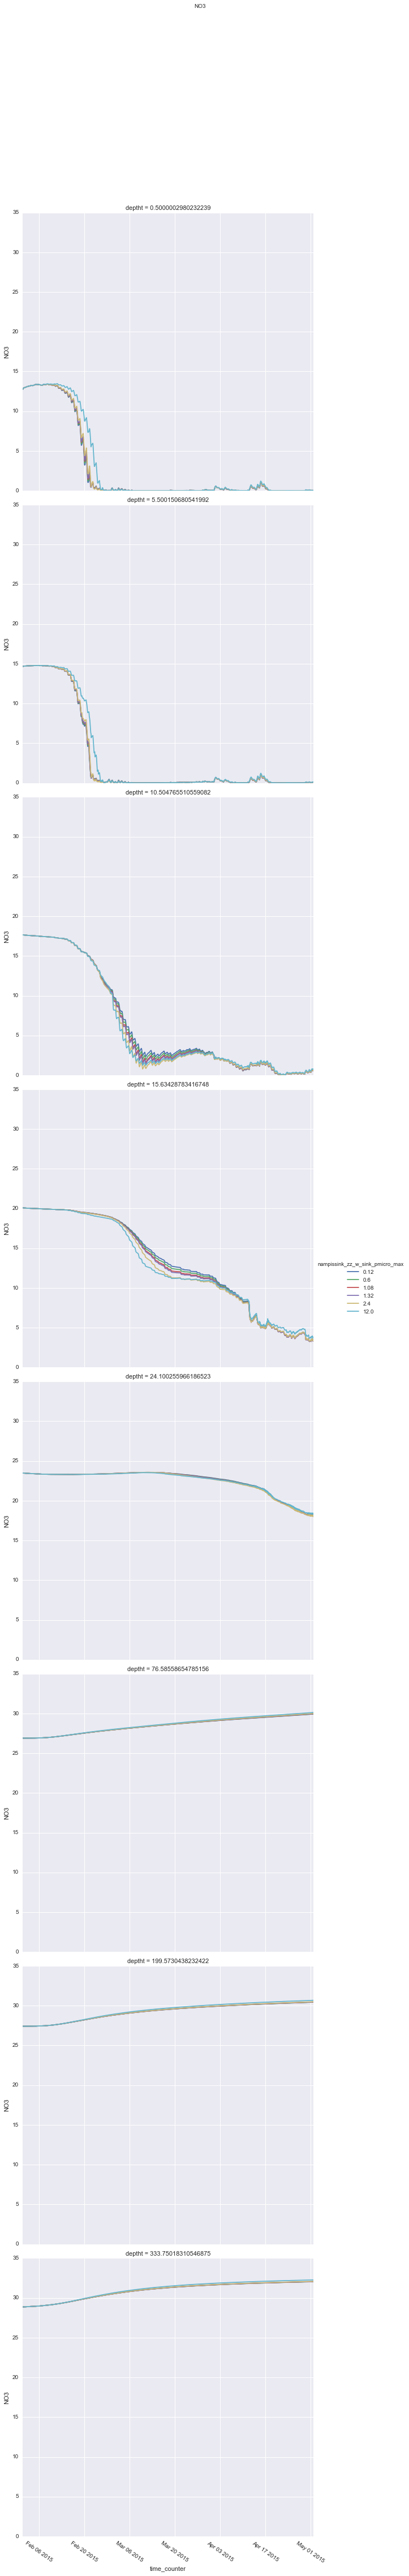

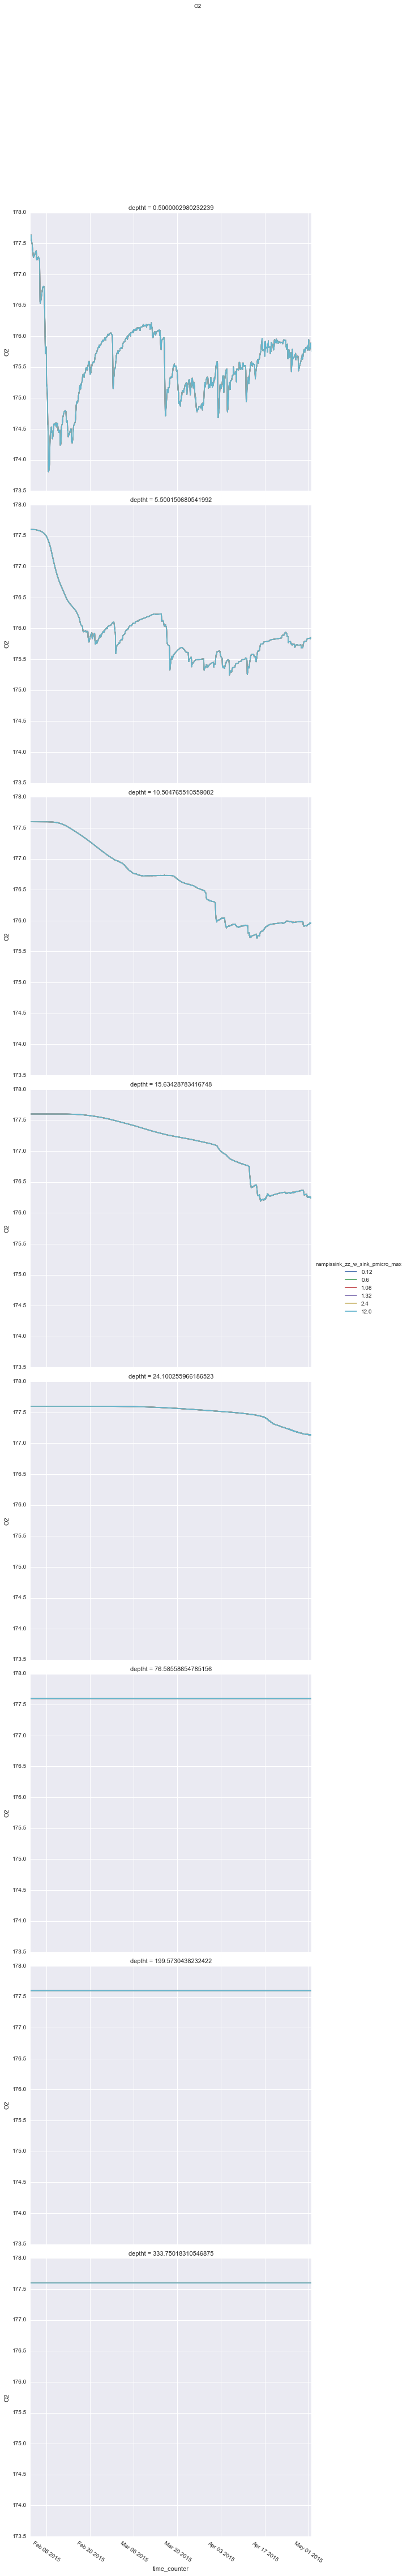

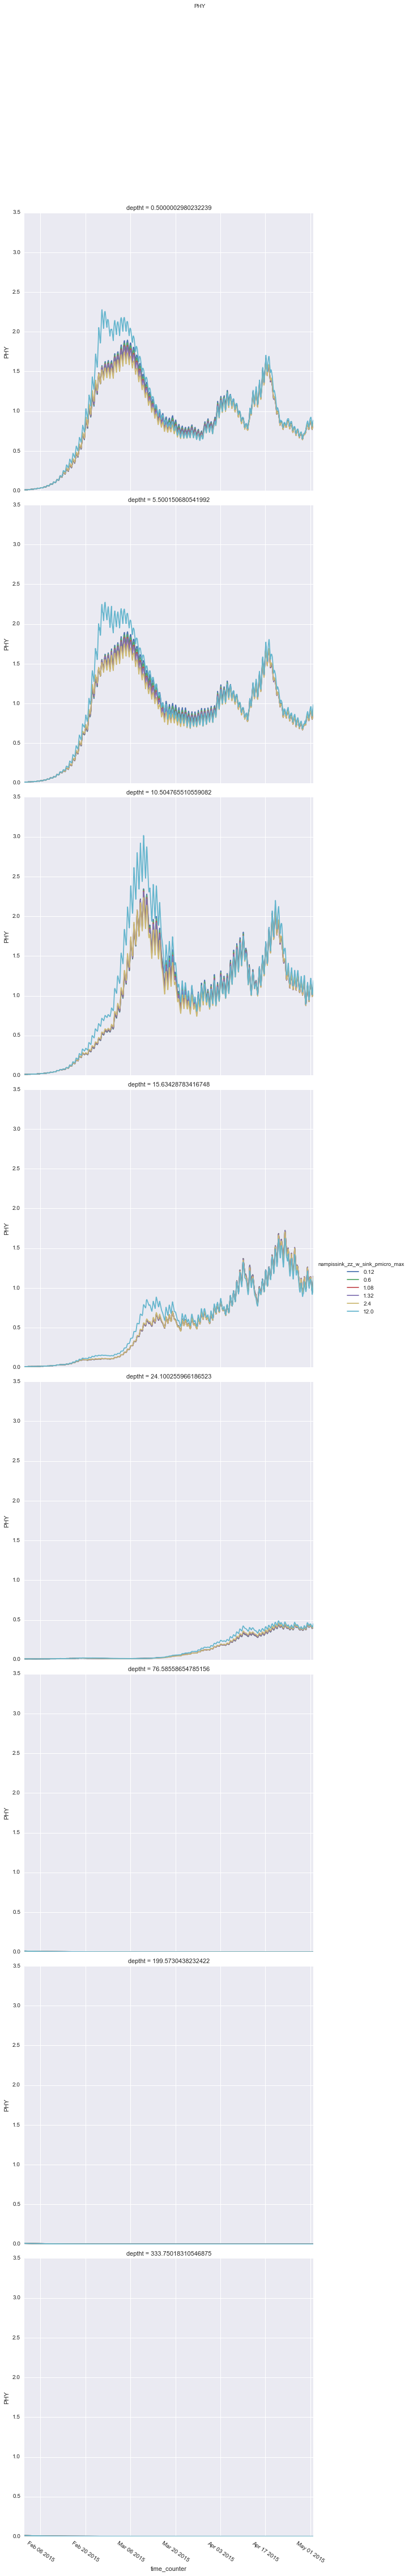

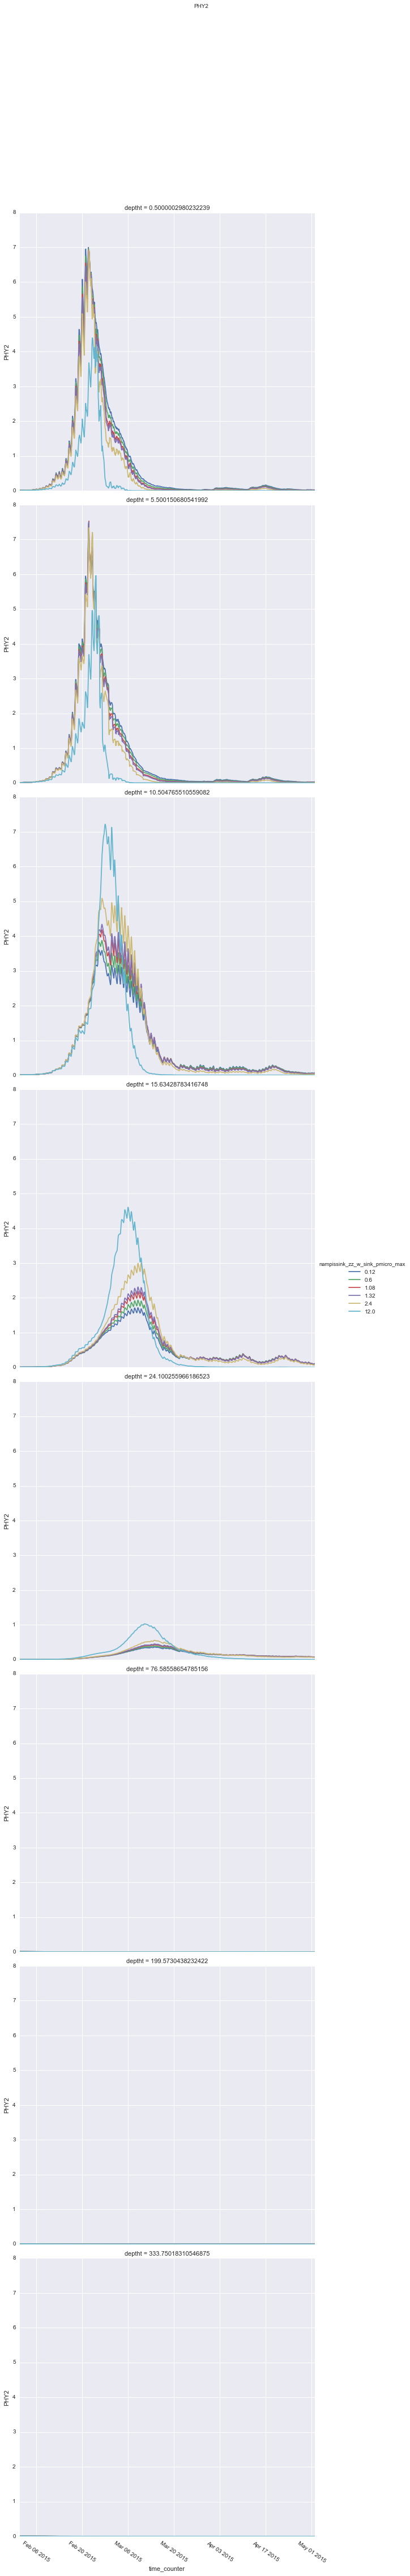

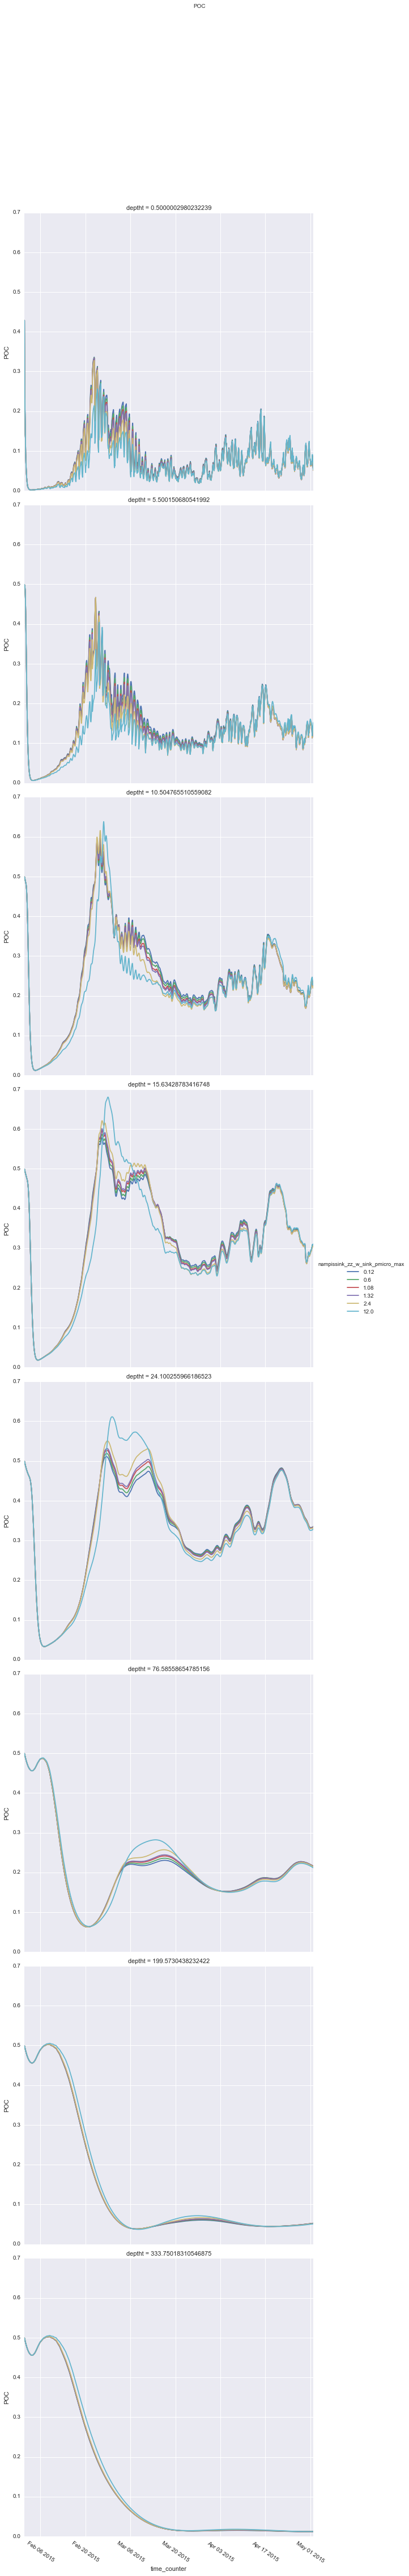

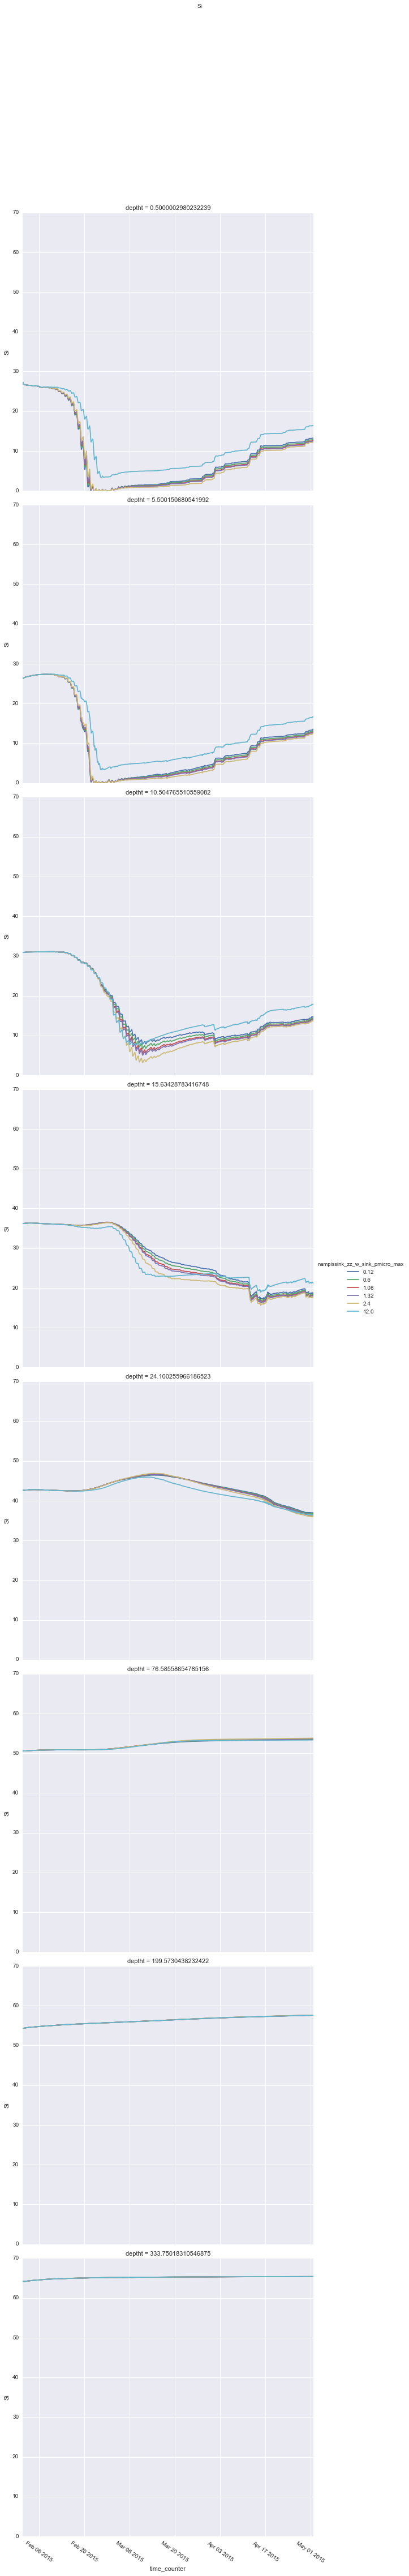

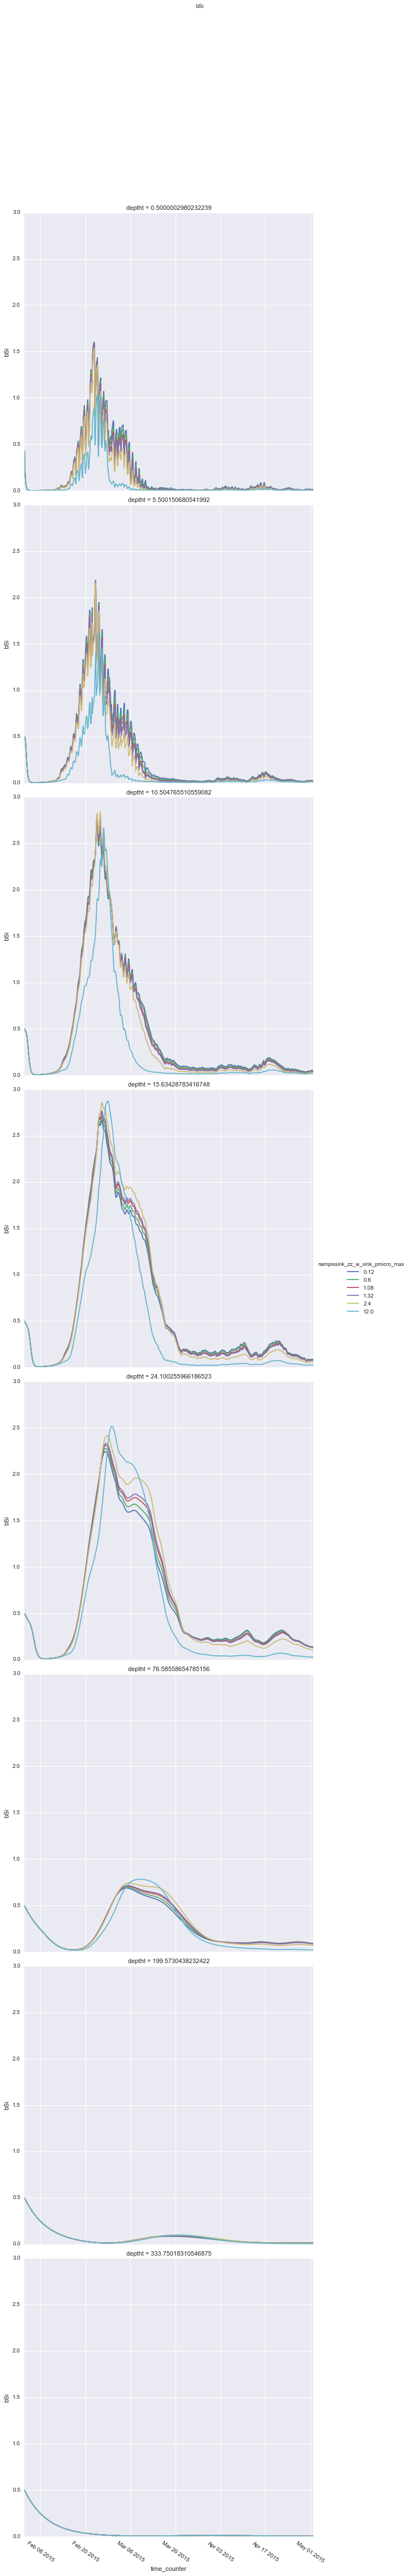

In [26]:
depth_vals = (df_subset['deptht'].unique())[0:40:5]

print(depth_vals)
for var in plot_vars:
    fg = sns.FacetGrid(data=df_subset.query("deptht in @depth_vals"), hue=param_name,row = "deptht",size =8)
    fg.map(plt.plot, 'time_counter', var).add_legend()
    fg.set_xticklabels(rotation=-35)
    plt.subplots_adjust(top=0.9)
    fg.fig.suptitle(var)